# **FOR LOGISTIC ALGORITHM::**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path="/content/mobile user dataset.csv"
data=pd.read_csv(path)
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Device Model']=le.fit_transform(data['Device Model'])
data['Operating System']=le.fit_transform(data['Operating System'])
data.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,322,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,4,1,187,4.3,1367,58,988,31,0,3


In [ ]:
x=data[["Gender","Device Model","Operating System","App Usage Time (min/day)","Screen On Time (hours/day)","Battery Drain (mAh/day)","Number of Apps Installed","Data Usage (MB/day)","Age"]]
y=data["User Behavior Class"]
print(x)
print(y)


     Gender  Device Model  Operating System  App Usage Time (min/day)  \
0         1             0                 0                       393   
1         0             1                 0                       268   
2         1             3                 0                       154   
3         1             0                 0                       239   
4         0             4                 1                       187   
..      ...           ...               ...                       ...   
695       1             4                 1                        92   
696       1             3                 0                       316   
697       0             0                 0                        99   
698       1             2                 0                        62   
699       0             1                 0                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1  

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Gender  Device Model  Operating System  App Usage Time (min/day)  \
45        1             3                 0                       502   
285       1             1                 0                       534   
62        1             3                 0                        79   
386       1             1                 0                        98   
668       1             4                 1                       170   
..      ...           ...               ...                       ...   
359       0             2                 0                       230   
192       0             4                 1                       432   
629       1             4                 1                       461   
559       1             1                 0                       553   
684       1             0                 0                       218   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
45                         10.9                     2476   
285

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print(y_pred)

[3 2 2 5 2 4 5 3 5 4 1 1 4 2 4 5 3 1 3 5 1 3 1 1 4 5 4 4 3 3 4 2 2 5 5 2 3
 4 5 4 5 5 5 2 5 3 5 5 4 5 3 1 5 2 3 3 5 2 3 4 5 3 4 1 4 3 2 4 2 4 4 1 4 3
 5 5 4 3 2 2 2 1 4 2 1 3 5 4 5 2 3 5 2 2 5 4 5 5 2 1 5 4 1 4 2 3 1 5 5 1 1
 1 2 1 4 3 4 2 2 3 2 1 5 2 4 4 1 5 3 4 5 4 2 2 5 1 3 3 5 5]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[17,  6,  0,  0,  0],
       [ 4, 16,  3,  0,  0],
       [ 0,  6, 19, 15,  2],
       [ 0,  0,  3, 14,  9],
       [ 0,  0,  0,  1, 25]])

Text(0.5, 23.52222222222222, 'Predicted Label')

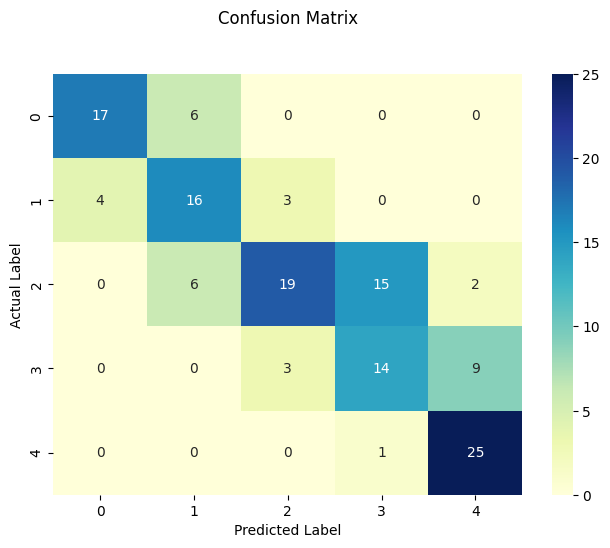

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.65


In [2]:
print("Precision:",metrics.precision_score(y_test,y_pred),average='macro')

NameError: name 'metrics' is not defined

## FOR KNN ALGORITHM

[[23  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 42  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 26]]
accuracy 1.0
precision 1.0
recall =  1.0
f1 1.0


Text(0.5, 23.52222222222222, 'predicated labels')

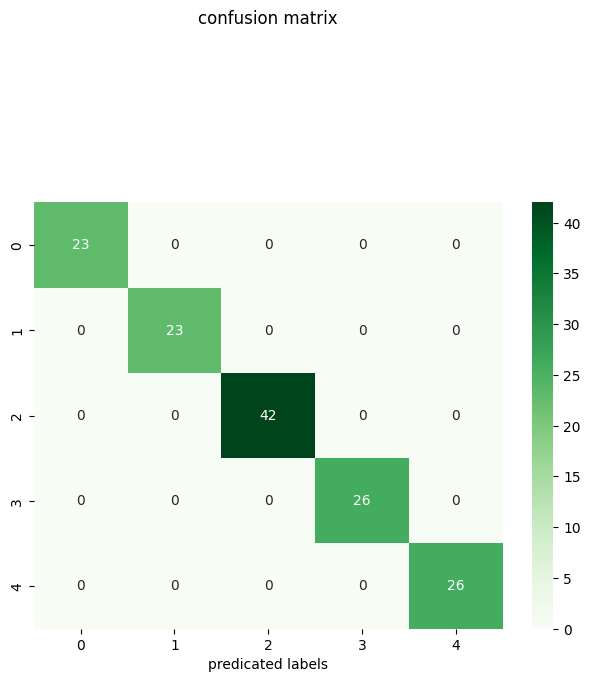

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline


df = pd.read_csv('/content/mobile user dataset.csv')
# print(df)
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Device Model'] = le.fit_transform(df['Device Model'])
df['Operating System'] = le.fit_transform(df['Operating System'])
# print(df)

x = df[['Gender','Device Model','Operating System','App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)','Age']].values
y = df['User Behavior Class'].values

# # training,testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
# print(y_pred)
# print(y_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)


accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)

precision = precision_score(y_test,y_pred, average='macro')
print("precision",precision)

recall = recall_score(y_test,y_pred, average='macro')
print("recall = ",recall)

f1 = f1_score(y_test,y_pred, average='macro')
print("f1",f1)

class_names= [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
print
# create headmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="Greens",fmt="d",annot_kws={"size":10})
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title("confusion matrix", y=1.4)
plt.xlabel('actual label')
plt.xlabel('predicated labels')
#plt.show